In [1]:
# Montar directorio de drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install unsloth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9

In [ ]:
!pip install python-dotenv

In [3]:
from unsloth import tokenizer_utils
def do_nothing(*args, **kwargs):
  pass
tokenizer_utils.fix_untrained_tokens = do_nothing

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [4]:
path = '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025'
#path = '../'
#path = '/home/lobezno/Documentos'

In [5]:
COLUMN_ID = 'id'
COLUMN_LETRA = 'lyrics'
COLUMN_ETIQUETA = 'label'
COLUMN_RAZONAMIENTO = 'reasoning'
COLUNM_ETIQUETALETRA = 'labelconletras'
csv_train_filepath = f'{path}/data/train_data/task2_GPT4o_dataReasoning.csv'
model_name_unsloth = 'Qwen3-8B-Base-unsloth-bnb-4bit'

In [ ]:
from dotenv import load_dotenv
import os
load_dotenv(f'{path}/cuadernos/.env')  # Carga las variables del .env

WANDB_TOKEN = os.getenv("WANDB_TOKEN")

In [ ]:
import wandb
wb_token = WANDB_TOKEN

wandb.login(key=wb_token)
run = wandb.init(
    project='Fine-tune-sin-CoT-Tarea-2',
    job_type="training",
    anonymous="allow"
)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: atorojaen (atorojaen-university-of-huelva) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
import torch
major_version, minor_version = torch.cuda.get_device_capability()
print(f"Major: {major_version}, Minor: {minor_version}")
from datasets import load_dataset
import datasets
from trl import SFTTrainer
import pandas as pd
import numpy as np
import os
import pandas as pd
import numpy as np
from unsloth import FastLanguageModel
from trl import SFTTrainer
from transformers import TrainingArguments, Trainer
from typing import Tuple
import warnings
from typing import Any, Dict, List, Union
from transformers import DataCollatorForLanguageModeling
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

NUM_CLASSES = 4 # number of classes in the csv

max_seq_length = 4096 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+

model_name = f"unsloth/{model_name_unsloth}"
load_in_4bit = False
# model_name = "Qwen3-4B-Base";load_in_4bit = False

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = model_name,load_in_4bit = load_in_4bit,
    max_seq_length = max_seq_length,
    dtype = dtype,
)

Major: 8, Minor: 9
==((====))==  Unsloth 2025.4.7: Fast Qwen3 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.71k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/605 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

In [ ]:
number_token_ids = []
for i in range(0, NUM_CLASSES+1):
    number_token_ids.append(tokenizer.encode(str(i), add_special_tokens=False)[0])
# keep only the number tokens from lm_head
par = torch.nn.Parameter(model.lm_head.weight[number_token_ids, :])

old_shape = model.lm_head.weight.shape
old_size = old_shape[0]
print(par.shape)
print(old_shape)

model.lm_head.weight = par

reverse_map = {value: idx for idx, value in enumerate(number_token_ids)} # will be used later to convert an idx from the old tokenizer to the new lm_head
reverse_map

torch.Size([5, 4096])
torch.Size([151936, 4096])


{15: 0, 16: 1, 17: 2, 18: 3, 19: 4}

In [ ]:
lora_r = 16
lora_alpha = 16
learning_rate = 2e-5

In [ ]:
from peft import LoftQConfig

model = FastLanguageModel.get_peft_model(
    model,
    r = lora_r,
    target_modules = [
        "lm_head", # can easily be trained because it now has a small size
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",],
    lora_alpha = lora_alpha,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth",
    random_state = 3407,
    use_rslora = True,  # We support rank stabilized LoRA
    # init_lora_weights = 'loftq',
    # loftq_config = LoftQConfig(loftq_bits = 4, loftq_iter = 1), # And LoftQ
)
print("trainable parameters:", sum(p.numel() for p in model.parameters() if p.requires_grad))

Unsloth: Offloading output_embeddings to disk to save VRAM


Unsloth 2025.4.7 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


Unsloth: Training lm_head in mixed precision to save VRAM
trainable parameters: 43667456


In [6]:
from datasets import Dataset
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import train_test_split
print(f"Cargando datos desde: {csv_train_filepath}")
try:
    # 1. Cargar el DataFrame separado
    df = pd.read_csv(csv_train_filepath, encoding='utf-8', encoding_errors="replace", sep=',')
    #test_df = pd.read_csv(csv_test_filepath, encoding='utf-8', encoding_errors="replace", sep=',')
    print(f"Columnas encontradas en el CSV: {df.columns.tolist()}")

    # 2. Dividir los datos
    print(f"Total de filas válidas antes de dividir: {len(df)}")
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[COLUMN_ETIQUETA])
    train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df[COLUMN_ETIQUETA])
    print(f"División completada:")
    print(f"  - Tamaño del conjunto de Entrenamiento: {len(train_df)}")
    print(f"  - Tamaño del conjunto de Validación:  {len(valid_df)}")
    print(f"  - Tamaño del conjunto de Test:         {len(test_df)}")

     # --- COMPROBACIÓN DE PROPORCIONES DE CLASE ---
    print("\n--- Distribución de Clases ---")
    print("Conjunto de Entrenamiento:")
    print(train_df[COLUNM_ETIQUETALETRA].value_counts(normalize=False)) # Conteos absolutos

    print("\nConjunto de Validación:")
    print(valid_df[COLUMN_ETIQUETA].value_counts(normalize=False))

    print("\nConjunto de Test:")
    print(test_df[COLUMN_ETIQUETA].value_counts(normalize=False))
    print("-----------------------------")

    nr_class_df = train_df[train_df[COLUMN_ETIQUETA] == 0]
    s_class_df = train_df[train_df[COLUMN_ETIQUETA] == 1]
    v_class_df = train_df[train_df[COLUMN_ETIQUETA] == 2]
    h_class_df = train_df[train_df[COLUMN_ETIQUETA] == 3]

    #----PARA HACER OVERSAMPLING---
    v_oversampled_df = resample(v_class_df,
                                       replace=True,     # Permitir duplicados
                                       n_samples=150,
                                       random_state=42)
    h_oversampled_df = resample(h_class_df,
                                       replace=True,     # Permitir duplicados
                                       n_samples=100,
                                       random_state=42)

    train_df_balanced = pd.concat([nr_class_df, s_class_df, v_oversampled_df, h_oversampled_df])


    # Mezclar el DataFrame resultante para que las clases no estén agrupadas
    train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
    train_df_balanced['label'] = train_df_balanced['label'].replace({0: 1, 1: 2, 2: 3, 3: 4})
    valid_df['label'] = valid_df['label'].replace({0: 1, 1: 2, 2: 3, 3: 4})
    test_df['label'] = test_df['label'].replace({0: 1, 1: 2, 2: 3, 3: 4})


    print("\nConjunto de Entrenamiento nuevo:")
    print(train_df_balanced[COLUMN_ETIQUETA].value_counts(normalize=False))
    print("------------------------------------------")
except FileNotFoundError:
    print(f"Error: Archivo no encontrado en '{csv_train_filepath}'")
except Exception as e:
    print(f"Error inesperado durante la carga o división de datos: {e}")
    import traceback
    traceback.print_exc()

Cargando datos desde: /content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/data/train_data/task2_GPT4o_dataReasoning.csv
Columnas encontradas en el CSV: ['id', 'lyrics', 'reasoning', 'label', 'labelconletras']
Total de filas válidas antes de dividir: 1168
División completada:
  - Tamaño del conjunto de Entrenamiento: 747
  - Tamaño del conjunto de Validación:  187
  - Tamaño del conjunto de Test:         234

--- Distribución de Clases ---
Conjunto de Entrenamiento:
labelconletras
NR    337
S     278
V      82
H      50
Name: count, dtype: int64

Conjunto de Validación:
label
0    84
1    70
2    21
3    12
Name: count, dtype: int64

Conjunto de Test:
label
0    105
1     87
2     26
3     16
Name: count, dtype: int64
-----------------------------

Conjunto de Entrenamiento nuevo:
label
1    337
2    278
3    150
4    100
Name: count, dtype: int64
------------------------------------------


In [ ]:
from datasets import load_dataset
import datasets
prompt = """Analiza la siguiente letra de canción:
{}

Clasificala esta canción en una de las siguientes categorías:
Clase 1: No Relacionada
Clase 2: Sexualizacion
Clase 3: Violencia
Clase 4: Odio
SOLUCION
La cancion es: Clase {}"""

def formatting_prompts_func(dataset_):
    texts = []
    for i in range(len(dataset_['lyrics'])):
        t = dataset_['lyrics'].iloc[i]
        label = dataset_['label'].iloc[i]
        text = prompt.format(t, label)

        texts.append(text)
    return texts
train_df_balanced['text'] = formatting_prompts_func(train_df_balanced)
valid_df['text'] = formatting_prompts_func(valid_df)
train_dataset = datasets.Dataset.from_pandas(train_df_balanced,preserve_index=False)
eval_dataset = datasets.Dataset.from_pandas(valid_df,preserve_index=False)

In [ ]:
train_dataset[1]

{'id': 'T2_TRAIN_0572',
 'lyrics': 'siempre con mucho billete y un día había soñado y lo fui a realizar años en el contrabando, cosas del pasado no podré olvidar colecciones de juguetes y hablo de mis armas, mi especialidad traen unas letras grabadas que si las descifran las van a encontrar actos, faltas de respeto no soporta el hombre pa hacerlo enojar sus principios bien marcados, su vida ha dejado qué testificar huevos le sobran al vato y quedó demostrado, se puso en acción cuando agarraron su gente hizo que los soltaran, nadie los tentó ya se llevaron sorpresas porque se topan con ésta no me gusta ser verbero, pero igual, hay que darse a respetar cuatro letras de lealtad, en el chaleco las trae y se va hasta guadalajara, jalisco para toda mi plebada saludos muy especiales en septiembre me festejo, también me divierto, me gusta aprender cosas nuevas día con día, aquí en guadalajara tengo mi cartel dos erres tienen respeto y también el talento para trabajar en guanatos voy peinando y

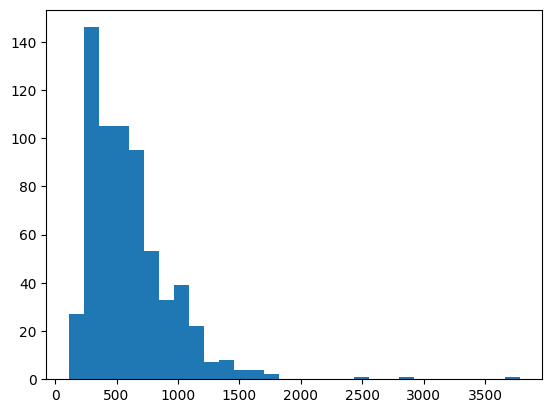

In [ ]:
token_counts = [len(tokenizer.encode(x)) for x in train_df.text]
# plot the token counts
a = plt.hist(token_counts, bins=30)

In [ ]:
# this custom collator makes it so the model trains only on the last token of the sequence. It also maps from the old tokenizer to the new lm_head indices
class DataCollatorForLastTokenLM(DataCollatorForLanguageModeling):
    def __init__(
        self,
        *args,
        mlm: bool = False,
        ignore_index: int = -100,
        **kwargs,
    ):
        super().__init__(*args, mlm=mlm, **kwargs)
        self.ignore_index = ignore_index

    def torch_call(self, examples: List[Union[List[int], Any, Dict[str, Any]]]) -> Dict[str, Any]:
        batch = super().torch_call(examples)

        for i in range(len(examples)):
            # Find the last non-padding token
            last_token_idx = (batch["labels"][i] != self.ignore_index).nonzero()[-1].item()

            # Set all labels to ignore_index except for the last token
            batch["labels"][i, :last_token_idx] = self.ignore_index
            # If the last token in the text is, for example, "2", then this was processed with the old tokenizer into number_token_ids[2]
            # But we don't actually want this because number_token_ids[2] could be something like 27, which is now undefined in the new lm_head. So we map it to the new lm_head index.
            batch["labels"][i, last_token_idx] = reverse_map[ batch["labels"][i, last_token_idx].item() ]


        return batch
collator = DataCollatorForLastTokenLM(tokenizer=tokenizer)

In [ ]:
from unsloth import is_bfloat16_supported
from transformers import EarlyStoppingCallback
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = train_dataset,
    eval_dataset = eval_dataset,
    max_seq_length = max_seq_length,
    dataset_num_proc = 1,
    callbacks = [EarlyStoppingCallback(early_stopping_patience=3)],
    packing = False,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 32,
        warmup_steps = 33,
        learning_rate = learning_rate,
        fp16 = not is_bfloat16_supported(),    # Usa FP16 si bfloat16 no está soportado
        bf16 = is_bfloat16_supported(),
        logging_steps = 25,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = f"{path}/cuadernos/outputsT2",
        #max_steps = 10,
        num_train_epochs = 10,
        eval_strategy="steps",
        eval_steps=25,
        save_strategy="steps",
        save_steps=25,
        load_best_model_at_end=True,
        save_total_limit=4,                        # Carga el mejor modelo según eval_loss
        metric_for_best_model="eval_loss",
        report_to = "wandb",
        group_by_length = True,
    ),
    data_collator=collator,
    dataset_text_field="text",
)

Unsloth: Tokenizing ["text"]:   0%|          | 0/787 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"]:   0%|          | 0/281 [00:00<?, ? examples/s]

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 787 | Num Epochs = 10 | Total steps = 120
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 32
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 32 x 1) = 64
 "-____-"     Trainable parameters = 43,667,456/7,612,093,440 (0.57% trained)


Step,Training Loss,Validation Loss
25,1.928100,1.092409
50,1.068600,0.891430
75,0.915800,0.798106
100,0.736200,0.826099


Could not locate the best model at /content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/cuadernos/outputs/checkpoint-75/pytorch_model.bin, if you are running a distributed training on multiple nodes, you should activate `--save_on_each_node`.


In [ ]:
# Save the current (trimmed) lm_head and bias
trimmed_lm_head = model.lm_head.weight.data.clone()
trimmed_lm_head_bias = model.lm_head.bias.data.clone() if hasattr(model.lm_head, "bias") and model.lm_head.bias is not None else torch.zeros(len(number_token_ids), device=trimmed_lm_head.device)

# Create a new lm_head with shape [old_size, hidden_dim]
hidden_dim = trimmed_lm_head.shape[1]
new_lm_head = torch.full((old_size, hidden_dim), 0, dtype=trimmed_lm_head.dtype, device=trimmed_lm_head.device)
new_lm_head_bias = torch.full((old_size,), -1000.0, dtype=trimmed_lm_head_bias.dtype, device=trimmed_lm_head_bias.device)

# Fill in the weights and bias for the allowed tokens (number_token_ids)
for new_idx, orig_token_id in enumerate(number_token_ids):
    new_lm_head[orig_token_id] = trimmed_lm_head[new_idx]
    new_lm_head_bias[orig_token_id] = trimmed_lm_head_bias[new_idx]

# Update the model's lm_head weight and bias
with torch.no_grad():
    new_lm_head_module = torch.nn.Linear(hidden_dim, old_size, bias=True, device=model.device)
    new_lm_head_module.weight.data.copy_(new_lm_head)
    new_lm_head_module.bias.data.copy_(new_lm_head_bias)
    model.lm_head.modules_to_save["default"] = new_lm_head_module

print(f"Remade lm_head: shape = {model.lm_head.weight.shape}. Allowed tokens: {number_token_ids}")

Remade lm_head: shape = torch.Size([151936, 4096]). Allowed tokens: [15, 16, 17, 18, 19]


In [ ]:
final_save_path = f'{path}/models/Model-{model_name}-SINCOT-R-{lora_r}-Alpha-{lora_alpha}-LR-{learning_rate}-Tarea-2'

In [ ]:
print(f"\nGuardando el mejor modelo en: {final_save_path}")
trainer.save_model(final_save_path)
tokenizer.save_pretrained(final_save_path)


Guardando el mejor modelo en: /content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2


('/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2/tokenizer_config.json',
 '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2/special_tokens_map.json',
 '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2/vocab.json',
 '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2/merges.txt',
 '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2/added_tokens.json',
 '/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-unsloth/Qwen3-8B-Base-unsloth-bnb-4bit-

In [7]:
final_save_path = "/content/drive/Othercomputers/Mi PC/TFG/MySonGyny/MySonGyny-2025/models/Model-Qwen3-8B-Base-unsloth-bnb-4bit-SINCOT-R-16-Alpha-16-LR-2e-05-Tarea-2-(PREDECIDO)"

In [8]:
from unsloth import FastLanguageModel
model, tokenizer = FastLanguageModel.from_pretrained(
    final_save_path,
    load_in_4bit = False,
    max_seq_length = 4096,
    dtype = None,
    use_exact_model_name = True,
)
print("Model loaded successfully.")

FastLanguageModel.for_inference(model)
prompt = """Analiza la siguiente letra de canción:
{}

Clasificala esta canción en una de las siguientes categorías:
Clase 1: No Relacionada
Clase 2: Sexualizacion
Clase 3: Violencia
Clase 4: Odio
SOLUCION
La cancion es: Clase {}"""
inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=1, use_cache=True)
decoded = tokenizer.batch_decode(outputs)
print(decoded)

==((====))==  Unsloth 2025.5.7: Fast Qwen3 patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.7.0+cu126. CUDA: 8.9. CUDA Toolkit: 12.6. Triton: 3.3.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.30. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors.index.json:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.90G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/166 [00:00<?, ?B/s]

Unsloth 2025.5.7 patched 36 layers with 36 QKV layers, 36 O layers and 36 MLP layers.


Model loaded successfully.
['Analiza la siguiente letra de canción:\n{}\n\nClasificala esta canción en una de las siguientes categorías:\nClase 1: No Relacionada\nClase 2: Sexualizacion\nClase 3: Violencia\nClase 4: Odio\nSOLUCION\nLa cancion es: Clase {}1']


In [9]:
max_seq_length = 4096
number_token_ids = [15, 16, 17, 18, 19]

Evaluating: 100%|██████████| 234/234 [00:53<00:00,  4.41it/s]


Validation accuracy: 64.96% (152/234)

--- Random samples ---

Text: na na na na na na noooo na na na na na no don! yo se que el amor se acabo que va a ser dificil ser igual que ya no sientes lo mismo que yo solo te pido una noche más para recordar solamente hagamos se
True: 2  Pred: 2 ✅
Probs: 1: 0.006, 2: 0.953, 3: 0.037, 4: 0.003

Text: z te dejo libre para que busque a quien querer yo quiero amor pero a tu lado no lo ayare quinza un herror he cometido al no mirar quen tanto tiempo eras la misma y no ia a cambiar el momento de partir
True: 1  Pred: 1 ✅
Probs: 1: 0.980, 2: 0.014, 3: 0.007, 4: 0.001

Text: tickets as low as $42 aunque no te importe nada la vida de un delfín nadarás a fin de siglo en tu pecera si no sabes si eres rata o una masa amorfa más sólo basta darle un beso al espejo si no quieres
True: 1  Pred: 1 ✅
Probs: 1: 0.781, 2: 0.064, 3: 0.050, 4: 0.105

Text: señora de las cuatro décadas y pisadas de fuego al andar su figura ya no es la de los quince pero el tiempo no 

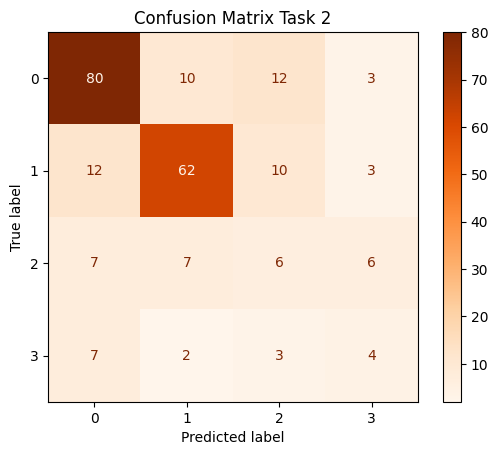

In [11]:
import torch
import torch.nn.functional as F
from tqdm import tqdm
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prepare inference prompt
inference_prompt_template = prompt.split("Clase {}")[0] + "Clase "

# Sort validation set by length for efficient batching
test_df['token_length'] = test_df['lyrics'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
val_df_sorted = test_df.sort_values(by='token_length').reset_index(drop=True)

display = 200
batch_size = 1
device = model.device
correct = 0
results = []
all_preds = []
all_trues = []

with torch.inference_mode():
    for i in tqdm(range(0, len(val_df_sorted), batch_size), desc="Evaluating"):
        batch = val_df_sorted.iloc[i:i+batch_size]
        prompts = [inference_prompt_template.format(text) for text in batch['lyrics']]
        inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=max_seq_length).to(device)
        logits = model(**inputs).logits
        last_idxs = inputs.attention_mask.sum(1) - 1
        last_logits = logits[torch.arange(len(batch)), last_idxs, :]
        probs_all = F.softmax(last_logits, dim=-1)
        probs = probs_all[:, number_token_ids] # only keep the logits for the number tokens
        preds = torch.argmax(probs, dim=-1).cpu().numpy() # looks like [1 1 1 1 3 1 3 1 3 1 1 1 1 2 2 3]

        true_labels = batch['label'].tolist()
        all_trues.extend(true_labels)
        all_preds.extend(preds)

        correct += sum([p == t for p, t in zip(preds, true_labels)])
        # Store a few samples for display
        for j in range(len(batch)):
            results.append({
                "text": batch['lyrics'].iloc[j][:200],
                "true": true_labels[j],
                "pred": preds[j],
                "probs": probs[j][1:].float().cpu().numpy(), # ignore prob for class 0 and convert from tensor to float
                "ok": preds[j] == true_labels[j]
            })

accuracy = 100 * correct / len(val_df_sorted)
print(f"\nValidation accuracy: {accuracy:.2f}% ({correct}/{len(val_df_sorted)})")

print("\n--- Random samples ---")
for s in random.sample(results, min(display, len(results))):
    print(f"\nText: {s['text']}")
    print(f"True: {s['true']}  Pred: {s['pred']} {'✅' if s['ok'] else '❌'}")
    print("Probs:", ", ".join([f"{k}: {v:.3f}" for k, v in enumerate(s['probs'], start=1)]))
cm = confusion_matrix(all_trues, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges', values_format='d')
plt.title("Confusion Matrix Task 2")
plt.show()

# Clean up
if 'token_length' in test_df:
    del test_df['token_length']

In [ ]:
test_df = pd.read_csv(f"{path}/data/test_data/testData_T2.csv", encoding='utf-8', encoding_errors="replace", sep=',')
#test_df = pd.read_csv(csv_test_filepath, encoding='utf-8', encoding_errors="replace", sep=',')
print(f"Columnas encontradas en el CSV: {df.columns.tolist()}")

Columnas encontradas en el CSV: ['id', 'lyrics', 'reasoning', 'label', 'labelconletras']


In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
from tqdm import tqdm
import random

# Asegúrate de que test_data tenga una columna 'text'
test_df['token_length'] = test_df['lyrics'].apply(lambda x: len(tokenizer.encode(x, add_special_tokens=False)))
#test_data_sorted = test_df.sort_values(by='token_length').reset_index(drop=True)

# Inference prompt (ajusta según tu plantilla)
inference_prompt_template = prompt.split("Clase {}")[0] + "Clase "
display = 50
batch_size = 1
device = model.device
predictions = []
label_map = {
    1: "NR",  # No relevante
    2: "S",   # Sexualizacion
    3: "V",   # Violencia
    4: "H"    # Odio
}

with torch.inference_mode():
    for i in tqdm(range(0, len(test_df), batch_size), desc="Predicting"):
        batch = test_df.iloc[i:i+batch_size]
        prompts = [inference_prompt_template.format(text) for text in batch['lyrics']]
        inputs = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True, max_length=max_seq_length).to(device)
        logits = model(**inputs).logits
        last_idxs = inputs.attention_mask.sum(1) - 1
        last_logits = logits[torch.arange(len(batch)), last_idxs, :]
        probs_all = F.softmax(last_logits, dim=-1)
        probs = probs_all[:, number_token_ids]
        preds = torch.argmax(probs, dim=-1).cpu().numpy()

        for j in range(len(batch)):
            predictions.append({
                "id": batch['id'].iloc[j],
                "label": label_map.get(preds[j]),
                "probs": probs[j][1:].float().cpu().numpy(),
            })
for s in random.sample(predictions, min(display, len(predictions))):
    print(f"\nText: {s['id']}")
    print(f"Pred: {s['label']}")
    print("Probs:", ", ".join([f"{k}: {v:.3f}" for k, v in enumerate(s['probs'], start=1)]))

# Guardar resultados en un CSV
predictions_df = pd.DataFrame(predictions)
predictions_df = predictions_df.drop(columns=["probs"])
predictions_df.to_csv(f"{path}/data/results/test_predictions.csv", index=False)
print("Predicciones guardadas en 'test_predictions.csv'")

Predicting: 100%|██████████| 293/293 [01:12<00:00,  4.05it/s]


Text: T2_TEST_0102
Pred: S
Probs: 1: 0.017, 2: 0.922, 3: 0.046, 4: 0.017

Text: T2_TEST_0178
Pred: NR
Probs: 1: 0.801, 2: 0.040, 3: 0.140, 4: 0.019

Text: T2_TEST_0230
Pred: NR
Probs: 1: 0.754, 2: 0.169, 3: 0.062, 4: 0.014

Text: T2_TEST_0145
Pred: NR
Probs: 1: 0.574, 2: 0.211, 3: 0.211, 4: 0.005

Text: T2_TEST_0057
Pred: NR
Probs: 1: 0.816, 2: 0.031, 3: 0.086, 4: 0.067

Text: T2_TEST_0058
Pred: V
Probs: 1: 0.021, 2: 0.195, 3: 0.531, 4: 0.252

Text: T2_TEST_0174
Pred: V
Probs: 1: 0.091, 2: 0.091, 3: 0.408, 4: 0.408

Text: T2_TEST_0121
Pred: S
Probs: 1: 0.033, 2: 0.863, 3: 0.091, 4: 0.012

Text: T2_TEST_0126
Pred: S
Probs: 1: 0.013, 2: 0.902, 3: 0.074, 4: 0.010

Text: T2_TEST_0196
Pred: NR
Probs: 1: 0.844, 2: 0.114, 3: 0.033, 4: 0.007

Text: T2_TEST_0268
Pred: NR
Probs: 1: 0.848, 2: 0.042, 3: 0.042, 4: 0.069

Text: T2_TEST_0107
Pred: NR
Probs: 1: 0.957, 2: 0.018, 3: 0.023, 4: 0.002

Text: T2_TEST_0109
Pred: NR
Probs: 1: 0.961, 2: 0.029, 3: 0.008, 4: 0.001

Text: T2_TEST_0060
Pred: NR
P